In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [27]:
def modified_euler(u_start, t_start, t_end, f, t_delta):
    """
    u(t_start) = u_start
    f: u' = f(u)
    """
    u_prev = u_start
    u = [u_prev]
    
    # t values
    steps = np.arange(t_start, t_end + t_delta, t_delta)
    
    for ti in steps:
        u_next_euler = (f(u_prev) * t_delta) + u_prev
        avg_slope = (f(u_next_euler) + f(u_prev)) / 2
        ui = (avg_slope * t_delta) + u_prev
        u_prev = ui
        
        u.append(ui)

    return steps, np.array(u[:-1])

In [62]:
def part1_problem1():
    starting = [(1, 1, 8),
                (1.01, 1, 8),
                (1.0001, 1, 8),
                (1.000001, 1, 8)]
    
    lorenz = lambda rho, sigma, beta: \
                lambda x: np.array([sigma * (x[1] - x[0]), 
                                    rho * x[0] - x[1] - x[0] * x[2],
                                    -beta * x[2] + x[0] * x[1]])
    
    # x is 3 dim
    for pt in starting:
        t, coords = modified_euler(pt, 0, 50, lorenz(28, 10, 8/3), 1/1000)
        x = coords[:,0]
    
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(t, x)

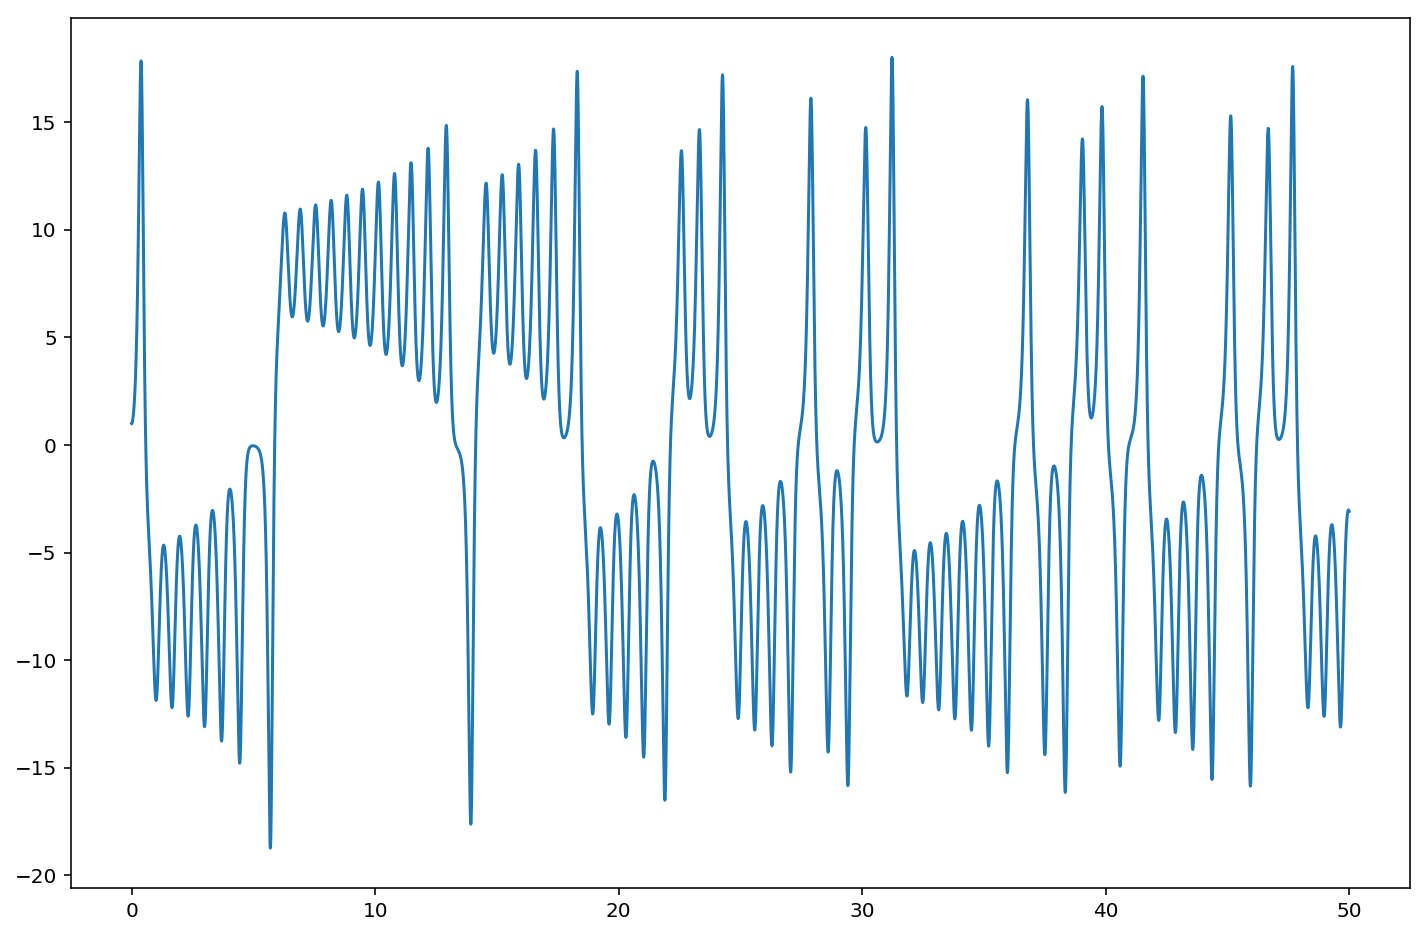

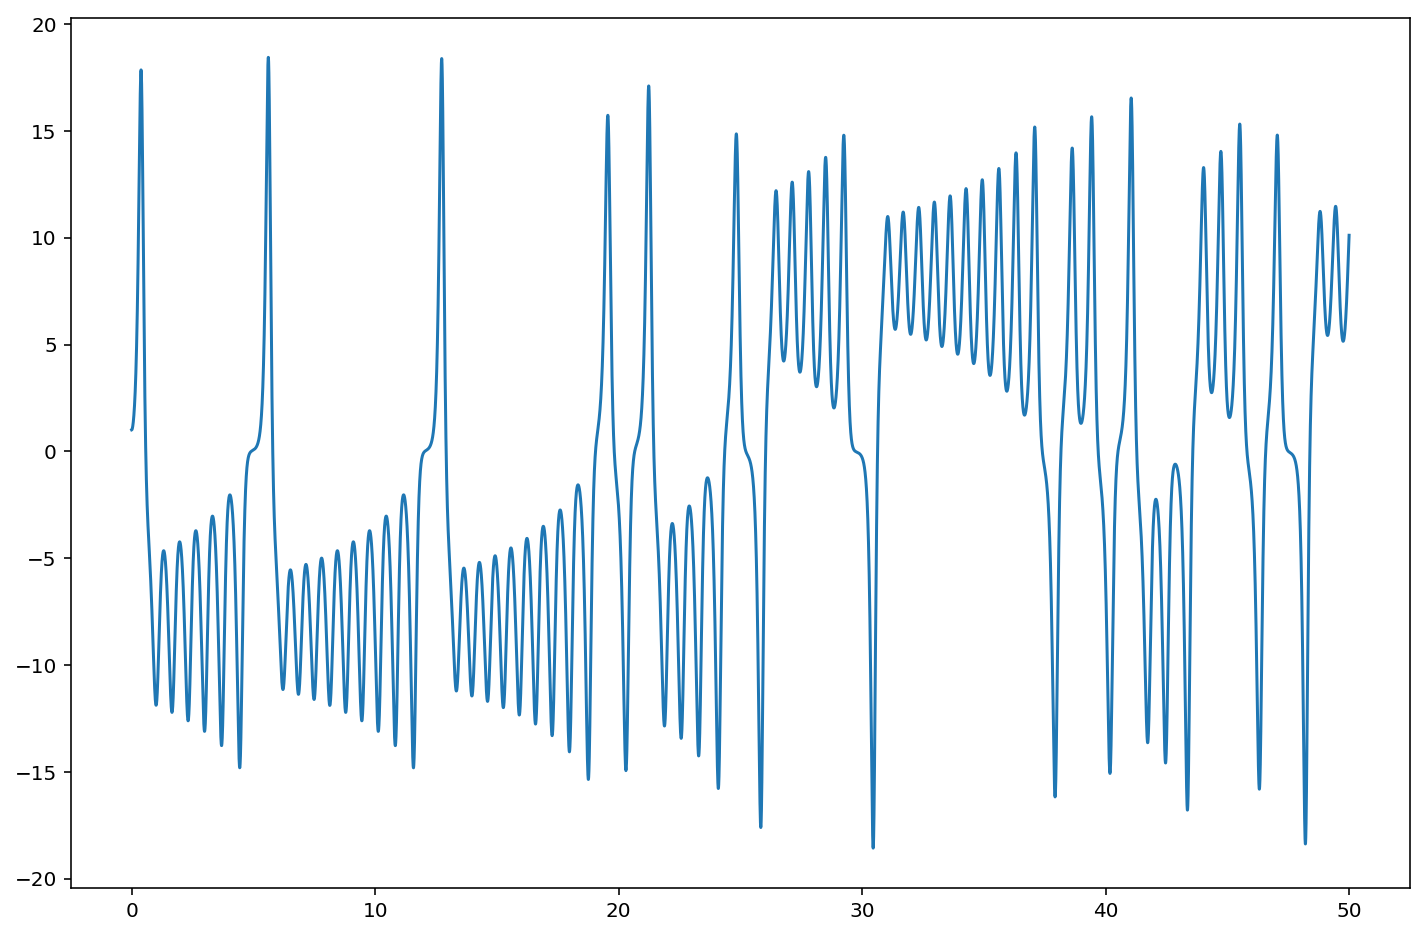

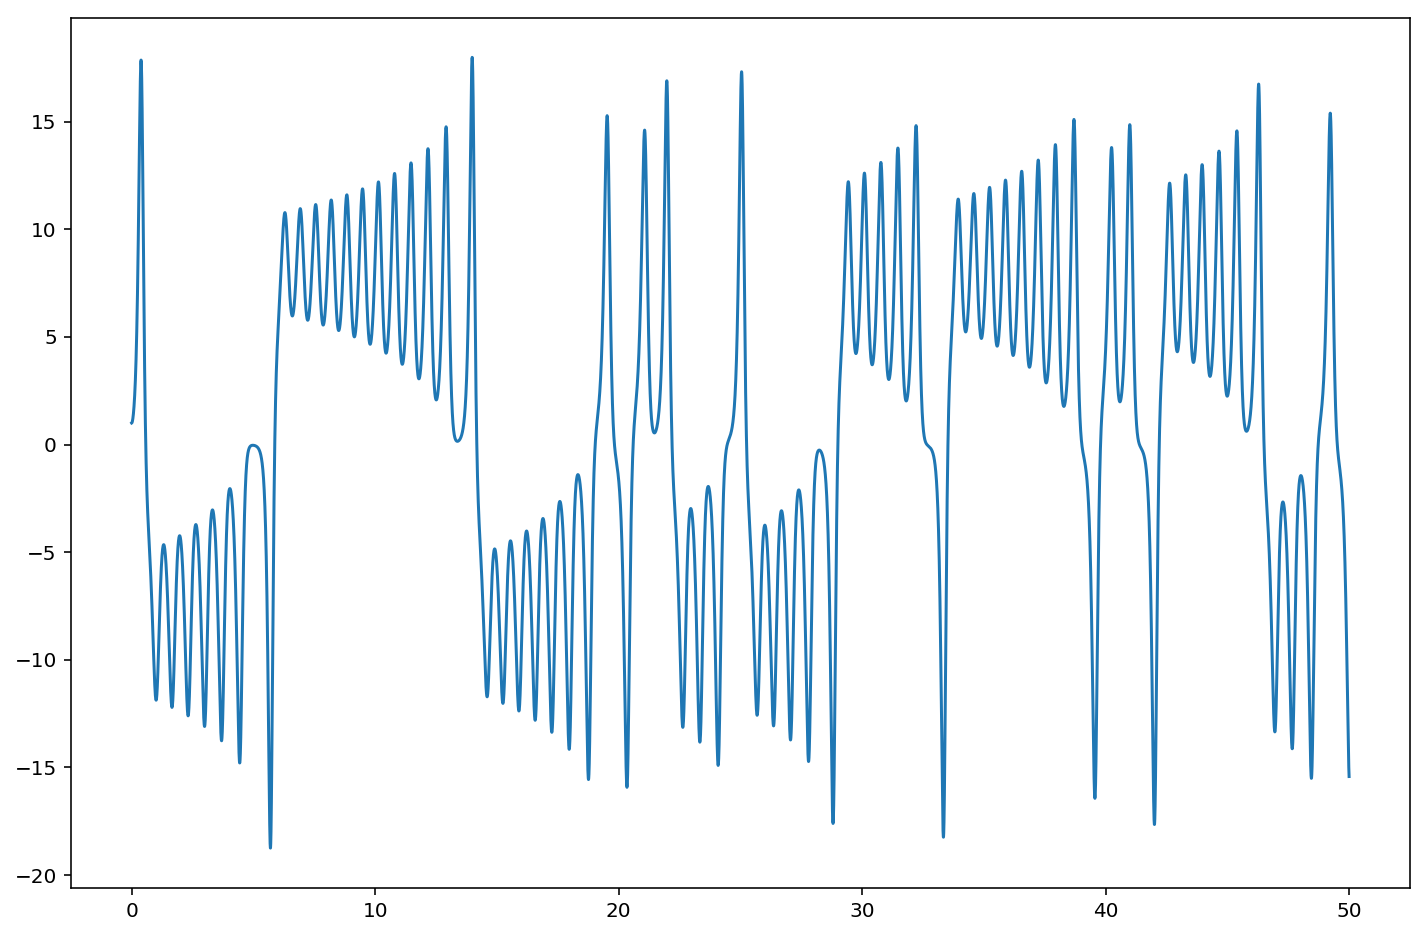

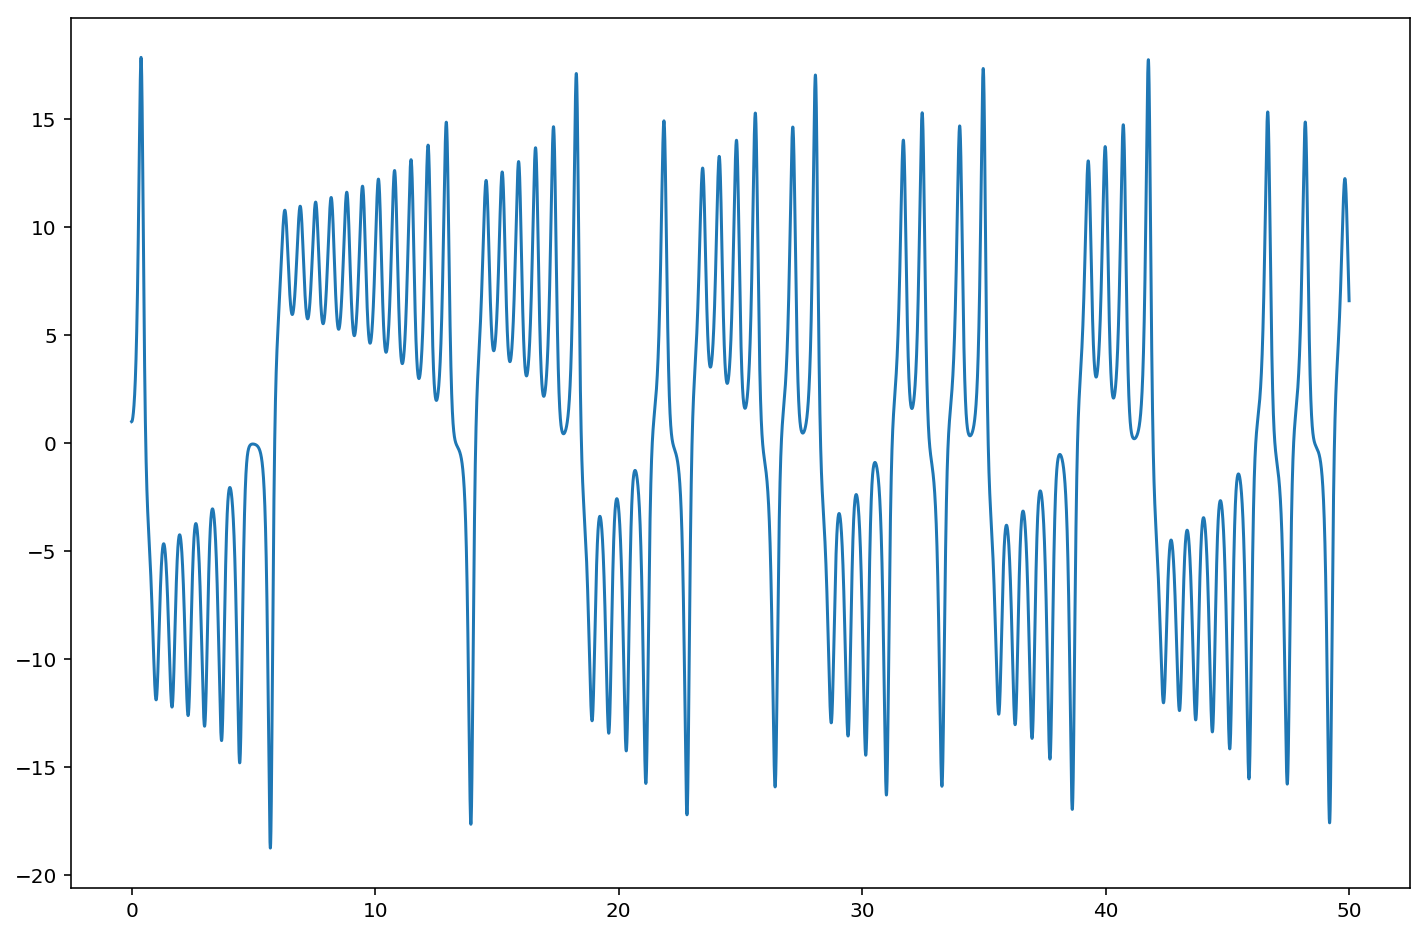

In [63]:
part1_problem1()